<a href="https://colab.research.google.com/github/kutayk33/Data-Analysis-and-Visualisation/blob/master/kmeans_clustering_for_customer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segmentation des Clients du Centre Commercial

### Contexte:

Le directeur d'une grande chaîne de magasins fait appel à nos services pour que nous aidions l'équipe marketing à déterminer la stratégie commerciale 

Pour ce faire, nous allons faire une segmentation de la clientèle , c'est à dire identifier les catégories de clients les plus à même de consommer, et comprendre leur comportements d'achats.

### Clustering
Le regroupement consiste à diviser la population ou les points de données en un certain nombre de groupes de sorte que les points de données des mêmes groupes soient plus similaires aux autres points de données du même groupe qu'à ceux des autres groupes. En termes simples, l'objectif est de séparer les groupes ayant des traits similaires et de les attribuer en grappes.

### KMeans Clustering 
Le clustering K-means est l'un des algorithmes d'apprentissage automatique non supervisé les plus simples et les plus populaires. Vous allez définir un nombre cible k, qui fait référence au nombre de centres de gravité dont vous avez besoin dans le jeu de données. Un centroïde est l'emplacement imaginaire ou réel représentant le centre de l'amas. Chaque point de données est alloué à chacun des clusters en réduisant la somme des carrés dans le cluster. En d'autres termes, l'algorithme K-means identifie k nombre de centroïdes, puis alloue chaque point de données au cluster le plus proche, tout en gardant les centroïdes aussi petits que possible.





## K Means Clustering 

### Import

In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [88]:
df = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/6b1ca02d-1c66-4783-b237-8fe0c2dea791.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Description de Variables:

**CustomerID:** ID unique attribué au client

**Gender:** Sexe du client

**Age:** Âge du client

**Annual Income (k$):** Revenu annuel du client

**Spending Score (1–100):** Score attribué par le centre commercial en fonction du comportement des clients et de la nature des dépenses.


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [90]:
# Brief Statistique de dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
# Dataset ne contient pas des valeurs null
df.isnull().sum().sum()

0

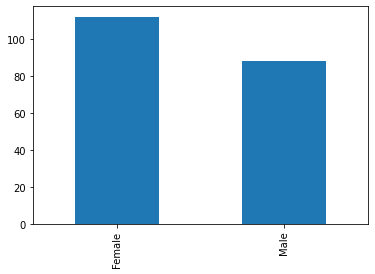

In [92]:
# Distribution de Gender
df.Gender.value_counts().plot(kind='bar')

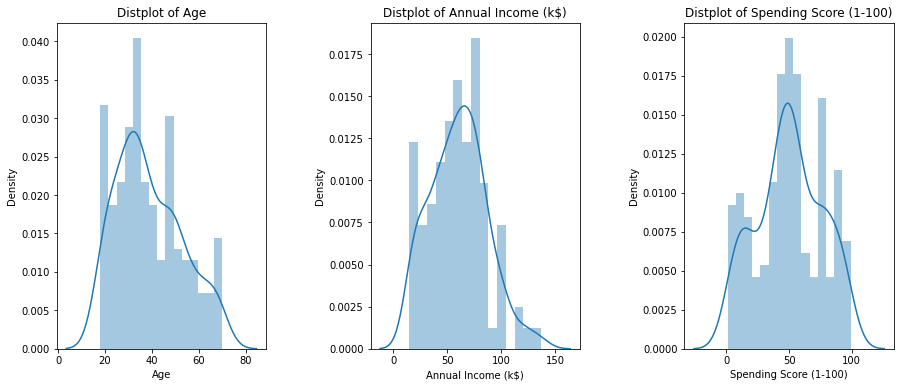

In [93]:
# Distribution des Variables Numeriques
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

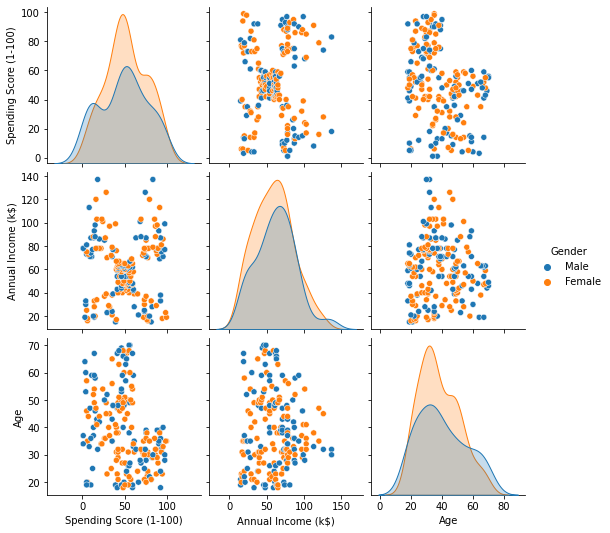

In [94]:
# Pairplot pour voire les distribution tout en ensemble 
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

## 2D Clustering basé sur Age et Spending Score

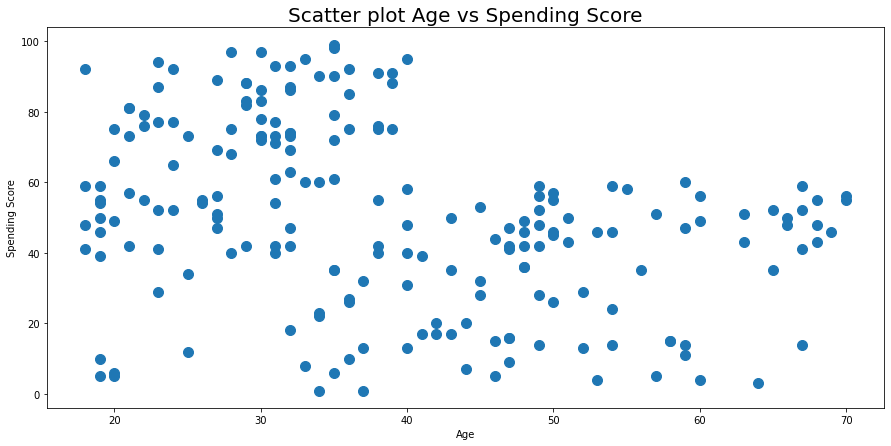

In [95]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot Age vs Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

### Trouver le 'k' value

In [96]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

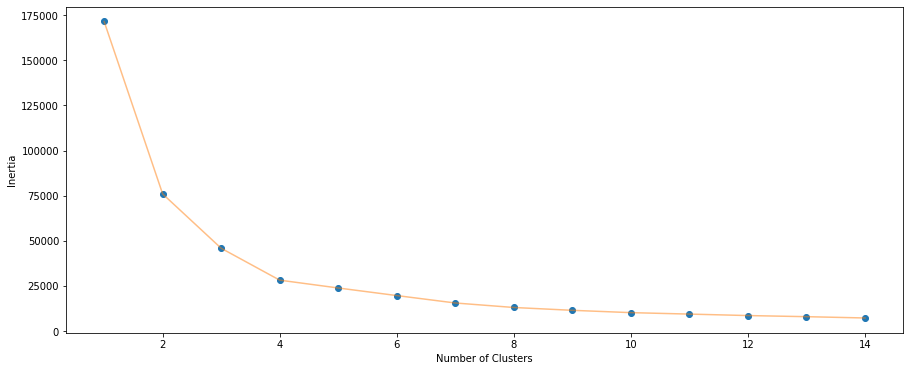

In [97]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

- D'apres le graph, on peut essayer les valeurs 4 et 5 pour le 'k'

### KMeans pour k=4

In [98]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [99]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

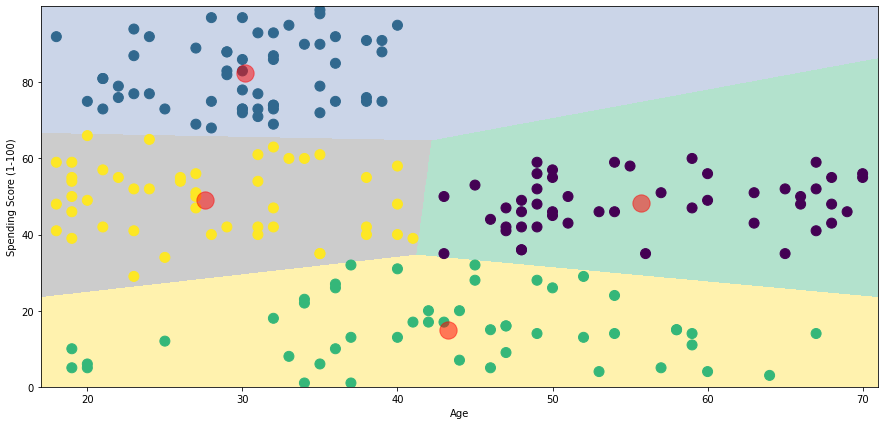

In [100]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### KMeans pour k=5

In [101]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111 , algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [102]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

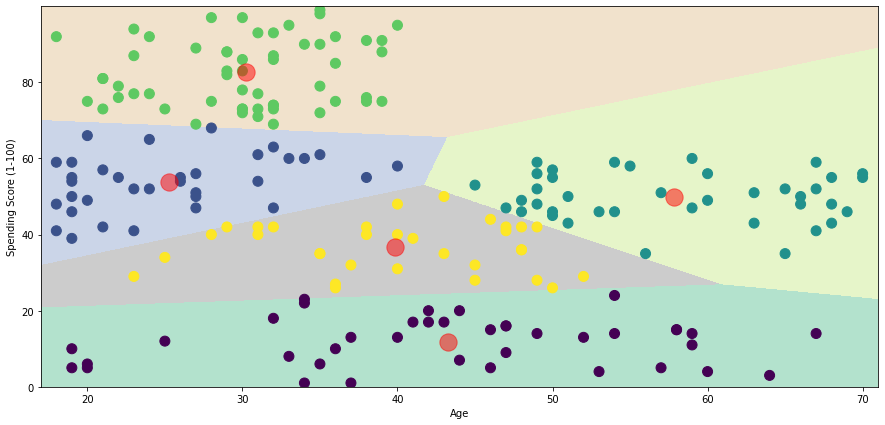

In [103]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

## 2D Clustering basé sur Annual Income et Spending Score

In [104]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

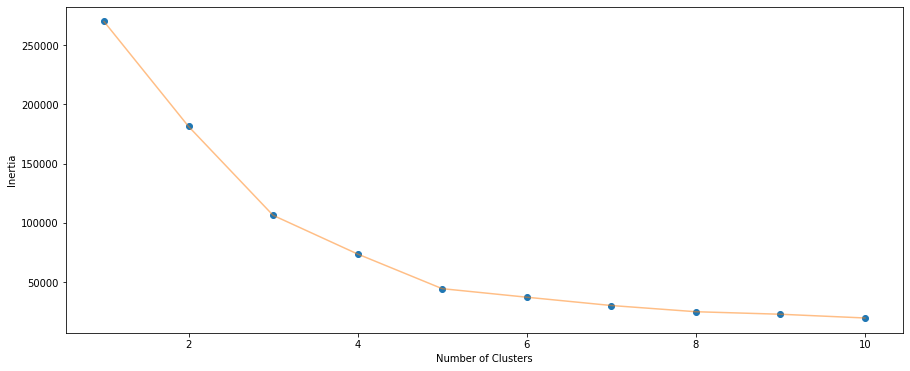

In [105]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [106]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [107]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

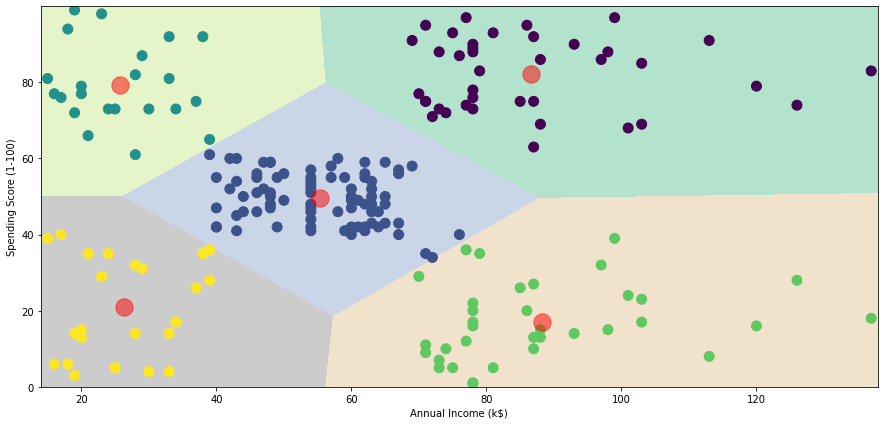

In [108]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

## 3D Clustering Age , Annual Income et Spending Score

In [109]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

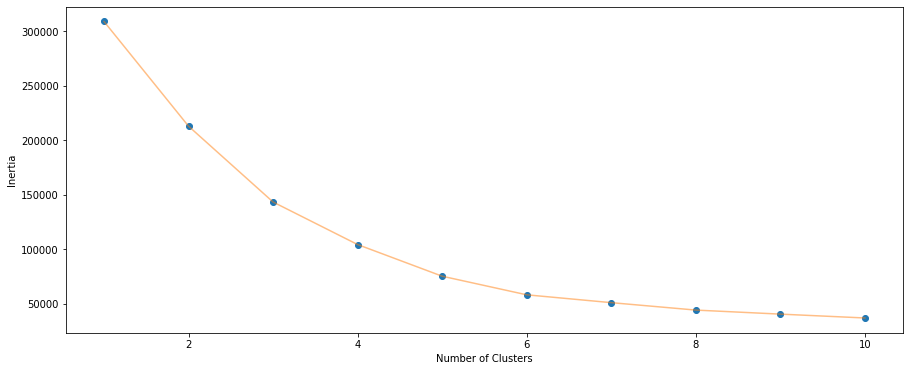

In [110]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [111]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)


In [112]:
# Ajouter cluster varibale à la dataset et l'enregistirer
df['Cluster'] = pd.DataFrame(y_kmeans)
df.to_csv("clients_segmentes.csv", index = False)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [114]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['Cluster'], 
        size= 10,
        line=dict(
            color= df['Cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clustering avec Age, Income et Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### Conclusion

Ainsi, nous avons analysé les données des clients et effectué un clustering 2D et 3D à l'aide de l'algorithme K Means. Ce type d'analyse de cluster permet de concevoir de meilleures stratégies d'acquisition de clients et contribue à la croissance de l'entreprise.


Nous connaissons désormais le comportement des clients en fonction de leur revenu annuel et de leur score de dépenses. Il peut y avoir de nombreuses stratégies de marketing appliquées pour les clients sur ces analyses de cluster. 

**Les clients à revenu élevé et à taux de dépenses élevé:** sont nos clients cibles et nous voudrions toujours les fidéliser car ils offrent la plus grande marge bénéficiaire. 

**Les clients à revenu élevé et moins dépensiers:** 
peuvent être attirés par une large gamme de produits exigés par leur style de vie et cela pourrait les attirer vers le supermarché Mall. 

**Les clients ayant moins de revenus et moins de dépenses:** peuvent bénéficier d'offres supplémentaires et leur envoyer constamment des offres et des réductions les attirera vers les dépenses. 

Nous pouvons également faire effectuer une analyse de cluster sur le type de produits que les clients ont tendance à acheter et élaborer d'autres stratégies de marketing en conséquence.

## Hierarchical Clustering

### Importer le dataset

In [115]:
df = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/6b1ca02d-1c66-4783-b237-8fe0c2dea791.csv')
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


### Label Encoder

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df.Gender)
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81


### Feature Selection 

- On peut faire l'algorithm en utilisant tous les feature mais on va utiliser seulement les 2 feature(Annual Income et Spending Score) pour pouvoir les illusturer 

In [117]:
X = df.iloc[:, [3, 4]].values

### Utilisation du dendrogram pour trouver le nombre optimal de clusters

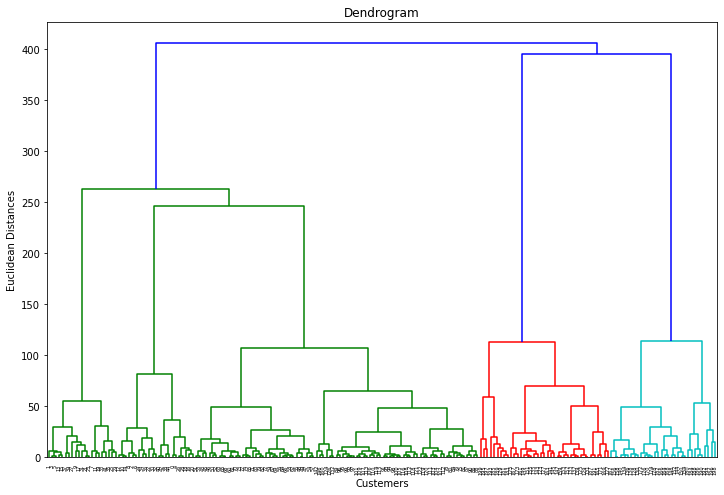

In [118]:
import scipy.cluster.hierarchy as sch 
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) #method='ward' is a best minimum variance method to minimize variance for each cluster 
plt.title('Dendrogram')
plt.xlabel('Custemers')
plt.ylabel('Euclidean Distances')
plt.show()

- On peut essayer de construire notre model avec 3 ou 5 cluster

### Training du modèle de clustering hiérarchique sur l'ensemble de données avec 5 clusters

In [119]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage='ward') 
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### Visualiser les clusters

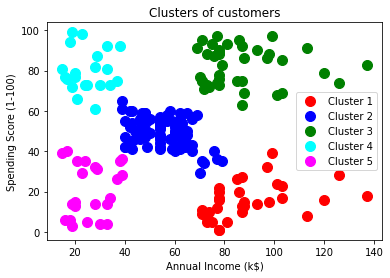

In [120]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Conclusion 

- Nous pouvons voir que les clients du centre commercial peuvent être globalement regroupés en 3 ou 5 groupes en fonction de leurs achats effectués dans le centre commercial. 

**Groupe 1:** nous voyons que les gens ont des revenus élevés mais des scores de dépenses faibles, c'est intéressant. Il s’agit peut-être de personnes insatisfaites ou mécontentes des services du centre commercial. Ceux-ci peuvent être les principales cibles du centre commercial, car ils ont le potentiel de dépenser de l'argent. Ainsi, les autorités du centre commercial essaieront d'ajouter de nouvelles installations afin d'attirer ces personnes et de répondre à leurs besoins.

**Groupe 2:** nous voyons que les gens ont un revenu moyen et un score de dépenses moyen, ces personnes ne seront pas non plus les principales cibles des magasins ou du centre commercial, mais encore une fois, elles seront prises en compte et d'autres techniques d'analyse de données peuvent être utilisées pour augmenter leur score de dépenses.

**Groupe 3:** nous voyons que les gens ont des revenus élevés et des scores de dépenses élevés, c'est le cas idéal pour le centre commercial ou les magasins car ces personnes sont les principales sources de profit. Ces personnes peuvent être les clients réguliers du centre commercial et sont convaincues par les installations du centre commercial.

**Groupe 4:** nous pouvons voir que les gens ont un faible revenu mais des scores de dépenses plus élevés, ce sont ces gens qui, pour une raison quelconque, aiment acheter des produits plus souvent même s'ils ont un faible revenu. C'est peut-être parce que ces personnes sont plus que satisfaites des services du centre commercial. Les magasins / centres commerciaux pourraient ne pas cibler ces personnes de manière efficace, mais ne les perdront toujours pas.

**Groupe 5:** nous pouvons voir que les gens ont un faible revenu annuel et de faibles scores de dépenses, c'est tout à fait raisonnable car les personnes à bas salaires préfèrent acheter moins, en fait, ce sont les gens sages qui savent comment dépenser et économiser de l'argent. ils peuvent bénéficier d'offres supplémentaires et nous pouvons leur envoyer constamment des offres et des réductions.